In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [2]:
def preprocess_data(file_path='E:\AIML Tasks\Titanic-Dataset.csv'):
    """Loads and fully preprocesses the Titanic dataset."""
    
    df = pd.read_csv(file_path)

    #  Step 1: Handle Missing Values & Drop Columns 
    embarked_mode = df['Embarked'].mode()[0]
    df['Embarked'] = df['Embarked'].fillna(embarked_mode)
    df = df.drop(columns=['Cabin', 'PassengerId', 'Ticket'])

    #  Step 2: Feature Engineering 
    def get_title(name):
        title_search = re.search(' ([A-Za-z]+)\.', name)
        if title_search:
            return title_search.group(1)
        return ""

    df['Title'] = df['Name'].apply(get_title)
    common_titles = ['Mr', 'Miss', 'Mrs', 'Master']
    df['Title'] = df['Title'].apply(lambda x: x if x in common_titles else 'Other')
    df = df.drop(columns=['Name'])

    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    df = df.drop(columns=['SibSp', 'Parch'])

    #  Step 3: Categorical Feature Encoding 
    le = LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex']) # male=1, female=0
    df = pd.get_dummies(df, columns=['Embarked', 'Title'], drop_first=True)

    #  Step 4: Define X and y, then Split 
    y = df['Survived']
    X = df.drop('Survived', axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #  Step 5: Post-Split Imputation (Age) 
    age_imputer = SimpleImputer(strategy='median')
    X_train.loc[:, 'Age'] = age_imputer.fit_transform(X_train[['Age']])
    X_test.loc[:, 'Age'] = age_imputer.transform(X_test[['Age']])

    #  Step 6: Post-Split Feature Scaling 
    cols_to_scale = ['Age', 'Fare', 'FamilySize']
    scaler = StandardScaler()
    X_train.loc[:, cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
    X_test.loc[:, cols_to_scale] = scaler.transform(X_test[cols_to_scale])
    
    return X_train, X_test, y_train, y_test

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:13: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:13: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Om\AppData\Local\Temp\ipykernel_34312\438311710.py:1: SyntaxWarning: invalid escape sequence '\A'
  def preprocess_data(file_path='E:\AIML Tasks\Titanic-Dataset.csv'):
C:\Users\Om\AppData\Local\Temp\ipykernel_34312\438311710.py:13: SyntaxWarning: invalid escape sequence '\.'
  title_search = re.search(' ([A-Za-z]+)\.', name)


--- Training Logistic Regression Model ---
--- Model Accuracy ---
Accuracy: 0.7989 (or 79.89%)

--- Classification Report ---
                     precision    recall  f1-score   support

Did Not Survive (0)       0.82      0.84      0.83       105
       Survived (1)       0.76      0.74      0.75        74

           accuracy                           0.80       179
          macro avg       0.79      0.79      0.79       179
       weighted avg       0.80      0.80      0.80       179


--- Generating Confusion Matrix ---
Saved 'logistic_regression_confusion_matrix.png'


C:\Users\Om\AppData\Local\Temp\ipykernel_34312\438311710.py:46: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.55466613 -0.55466613 -0.55466613  0.04009635  3.01390875  0.04009635
 -0.55466613  0.04009635 -0.55466613 -0.55466613 -0.55466613  0.63485883
 -0.55466613  0.04009635 -0.55466613  0.04009635  0.04009635 -0.55466613
 -0.55466613  0.04009635  3.01390875 -0.55466613 -0.55466613  0.63485883
 -0.55466613 -0.55466613  0.63485883 -0.55466613  1.22962131 -0.55466613
 -0.55466613  0.63485883 -0.55466613  0.04009635 -0.55466613  1.82438379
  1.82438379  0.63485883  0.04009635  0.04009635 -0.55466613 -0.55466613
 -0.55466613  0.63485883 -0.55466613 -0.55466613  0.63485883 -0.55466613
  1.22962131  0.04009635 -0.55466613  0.04009635  1.82438379 -0.55466613
 -0.55466613 -0.55466613 -0.55466613 -0.55466613 -0.55466613 -0.55466613
 -0.55466613 -0.55466613  0.04009635 -0.55466613 -0.55466613 -0.55466613
 -0.55466613 -0

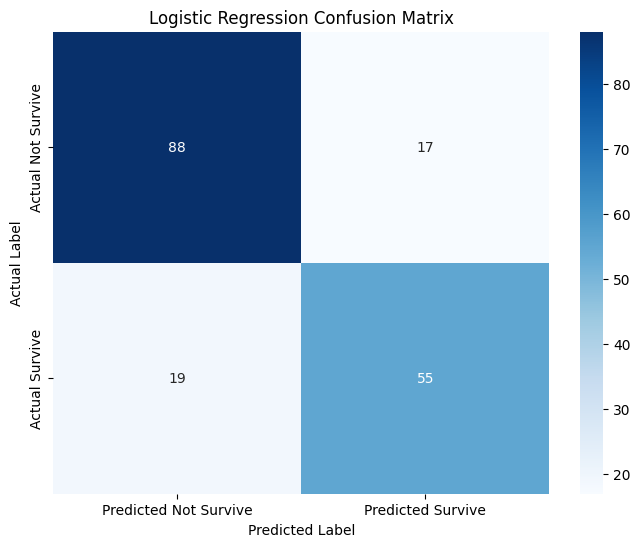

In [10]:
# Preprocessed data
X_train, X_test, y_train, y_test = preprocess_data()

print("--- Training Logistic Regression Model ---")
    
# Initializing the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Evaluate 
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"--- Model Accuracy ---")
print(f"Accuracy: {accuracy:.4f} (or {accuracy*100:.2f}%)")

print("\n--- Classification Report ---")
report = classification_report(y_test, y_pred, target_names=['Did Not Survive (0)', 'Survived (1)'])
print(report)

# Plot Confusion Matrix
print("\n--- Generating Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Not Survive', 'Predicted Survive'],
            yticklabels=['Actual Not Survive', 'Actual Survive'])
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('logistic_regression_confusion_matrix.png')
print("Saved 'logistic_regression_confusion_matrix.png'")


In [11]:
#  Save Model and Test Data 
print("Saving model and test data...")

# Save the Logistic Regression model
joblib.dump(model, 'logistic_model.joblib')

# Save the test data
joblib.dump(X_test, 'X_test.joblib')
joblib.dump(y_test, 'y_test.joblib')

print("Files saved: logistic_model.joblib, X_test.joblib, y_test.joblib")

Saving model and test data...
Files saved: logistic_model.joblib, X_test.joblib, y_test.joblib
